In [24]:
import pandas as pd
import numpy as np
from collections import Counter
import math
import matplotlib.pyplot as plt

In [25]:
# Load the CSV file
# df = pd.read_csv('flowstatsfile.csv')
df = pd.read_csv('som_data.csv')
print("Loaded")

debug = 1


Loaded


In [26]:
df.head()


,src_ip_entropy,src_port_entropy,dst_port_entropy,protocol_entropy,total_packets,label
0,1.0,-0.0,-0.0,-0.0,0,0
1,1.0,-0.0,-0.0,-0.0,8,0
2,1.0,-0.0,-0.0,-0.0,16,0
3,1.0,-0.0,-0.0,-0.0,24,0
4,1.0,-0.0,-0.0,-0.0,32,0


In [27]:
len(df)

549

In [28]:
# Check the data types and basic statistics of the numerical columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_ip_entropy     549 non-null    float64
 1    src_port_entropy  549 non-null    float64
 2    dst_port_entropy  549 non-null    float64
 3    protocol_entropy  549 non-null    float64
 4    total_packets     549 non-null    int64  
 5    label             549 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 25.9 KB
None


In [29]:
if debug == 1:
    print(df.describe())

       src_ip_entropy   src_port_entropy   dst_port_entropy  \
count      549.000000         549.000000         549.000000   
mean         6.343933           6.532130           0.746441   
std          4.456917           4.336845           1.275459   
min          1.000000          -0.000000          -0.000000   
25%          1.297472           3.017865           0.011145   
50%         10.022175          10.011013           0.012885   
75%         10.411958          10.388187           1.918296   
max         10.787780          10.759992           3.459920   

        protocol_entropy   total_packets       label  
count         549.000000      549.000000  549.000000  
mean            0.097008      192.300546    0.590164  
std             0.171463      110.430093    0.492252  
min            -0.000000        0.000000    0.000000  
25%             0.011145       98.000000    0.000000  
50%             0.012885      190.000000    1.000000  
75%             0.168661      286.000000    1.0

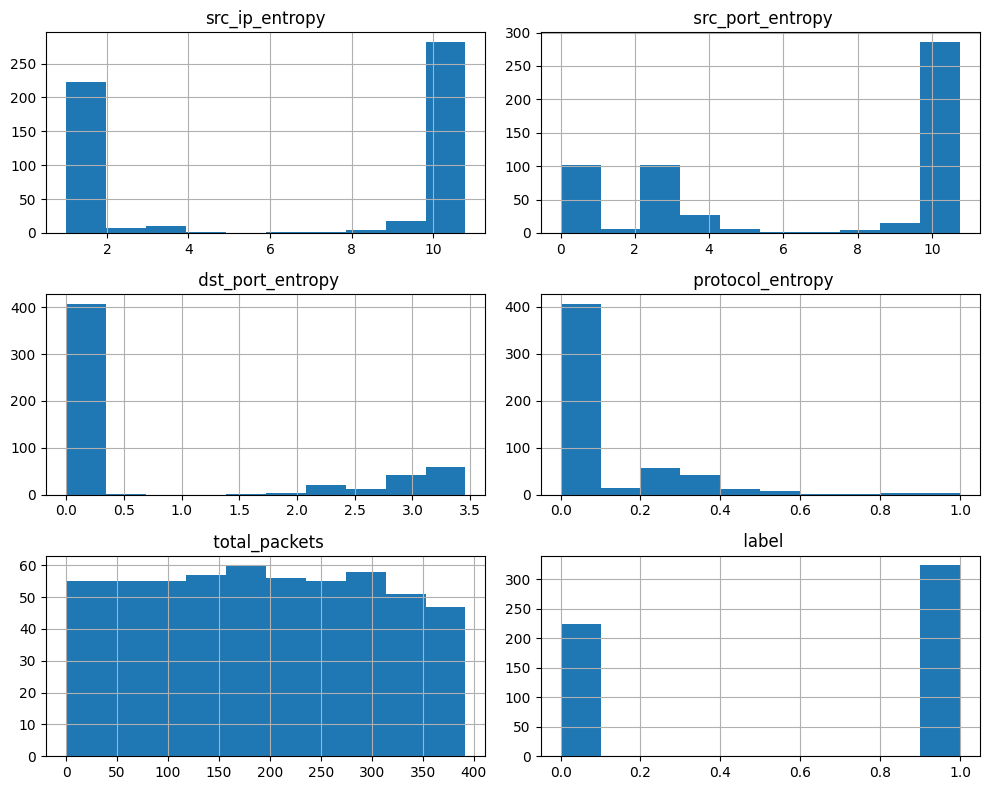

In [30]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [31]:
print(df[' label'])

0      0
1      0
2      0
3      0
4      0
      ..
544    1
545    1
546    1
547    1
548    1
Name:  label, Length: 549, dtype: int64


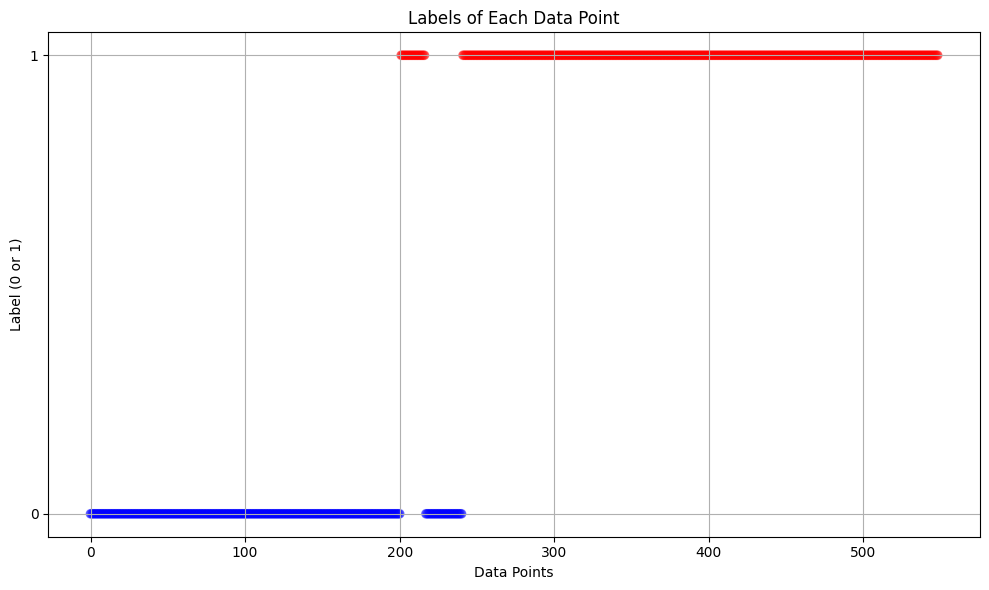

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV into DataFrame (adjust path as per your file location)
# df = pd.read_csv('your_dataset.csv')

# Extract the 'label' column
labels = df[' label']

# Count occurrences of each label
# labels = df['label']

# Assign colors based on label values
colors = ['blue' if label == 0 else 'red' for label in labels]

# Create a plot with y-axis showing labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), labels, marker='o', color=colors, alpha=0.5)
plt.yticks([0, 1])  # Ensure only 0 and 1 are shown on the y-axis
plt.xlabel('Data Points')
plt.ylabel('Label (0 or 1)')
plt.title('Labels of Each Data Point')
plt.grid(True)
plt.tight_layout()
plt.show()

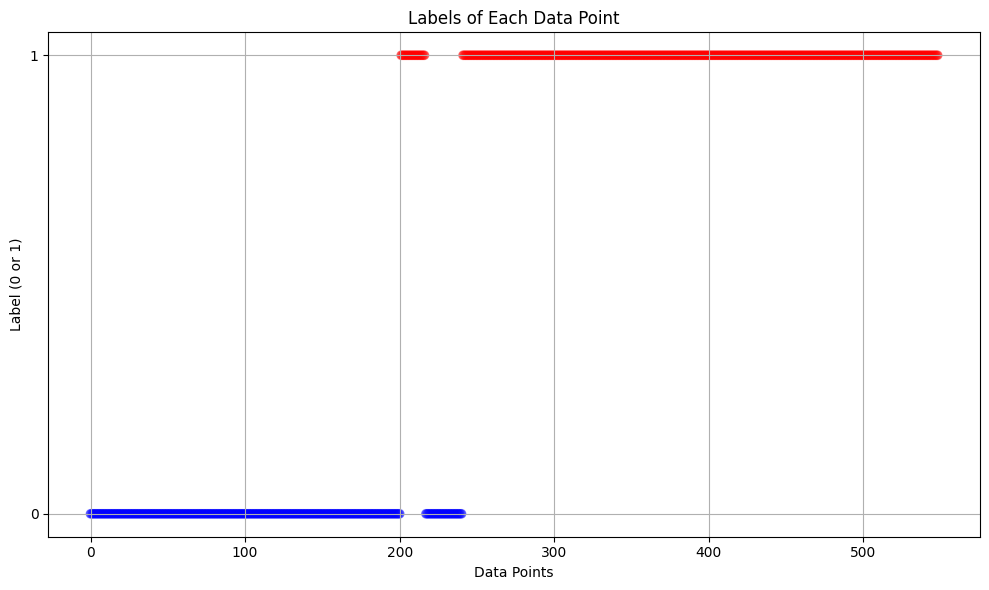

In [33]:
# Create y positions for plotting
y_positions = [0.1 if label == 0 else 0.9 for label in labels]

# Assign colors based on label values
# colors = ['blue' if label == 0 else 'red' for label in labels]

# Create a plot with y-axis showing labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels)), y_positions, marker='o', color=colors, alpha=0.5)
plt.yticks([0.1, 0.9], ['0', '1'])  # Set custom ticks for labels 0 and 1
plt.xlabel('Data Points')
plt.ylabel('Label (0 or 1)')
plt.title('Labels of Each Data Point')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# Assuming df is your original DataFrame containing the CSV data
# If df already contains datetime format for 'timestamp', skip this line
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Resample to 1-second intervals and calculate metrics
interval_df = df.set_index('timestamp').resample('1S').agg({
    'ip_src': lambda x: entropy(np.unique(x, return_counts=True)[1]) if len(x) > 0 else np.nan,
    'tp_src': lambda x: entropy(np.unique(x, return_counts=True)[1]) if len(x) > 0 else np.nan,
    'tp_dst': lambda x: entropy(np.unique(x, return_counts=True)[1]) if len(x) > 0 else np.nan,
    'ip_proto': lambda x: entropy(np.unique(x, return_counts=True)[1]) if len(x) > 0 else np.nan,
    'packet_count': 'sum'
}).reset_index()

# Rename columns to match the specified names
interval_df.columns = ['timestamp', 'etpSrcIP', 'etpSrcP', 'etpDstP', 'etpProtocol', 'totalPacket']

# Display or further process interval_df as needed
interval_df.head()


KeyError: 'timestamp'